<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/KDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KDE

KDE intenta estimar la función de densidad de probabilidad $f(x)$ de una variable aleatoria $X$ a partir de una muestra de datos $\{x_1,x_2, \dots, x_N\}$. La estimación KDE de la función de densidad en el punto $\mathbf x$ se define como:
$$
\hat{f}(x) = \frac{1}{Nh} \sum_{n=1}^{N} K\left(\frac{x - x_n}{h}\right)
$$
Donde:
- $K$ es el kernel, una función que satisface ciertas condiciones.
- $h$ es el ancho de banda, que controla cuán suave es la estimación.

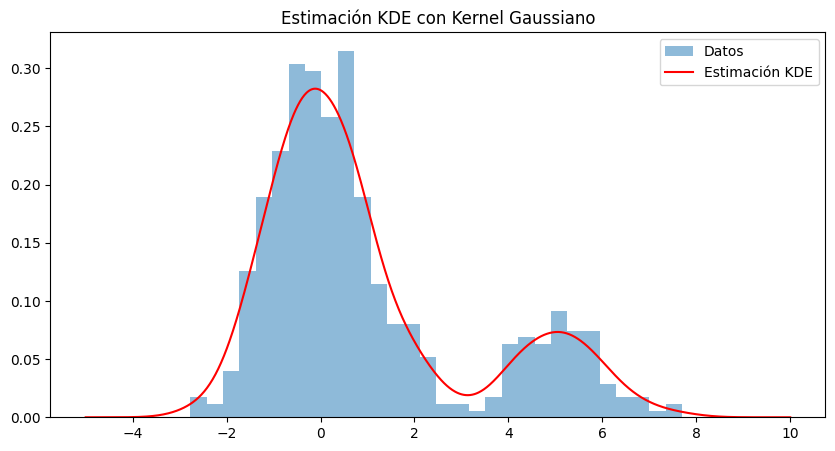

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generando datos unidimensionales
np.random.seed(0)
data = np.concatenate([np.random.normal(0, 1, 400),
                       np.random.normal(5, 1, 100)])
data = data[:, np.newaxis]  # Convertir a formato de columna

# Estimación KDE usando el kernel Gaussiano
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data)
x_d = np.linspace(-5, 10, 1000)[:, np.newaxis]
log_density = kde.score_samples(x_d)
density = np.exp(log_density)

# Plot
plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Datos')
plt.plot(x_d, density, '-r', label='Estimación KDE')
plt.title('Estimación KDE con Kernel Gaussiano')
plt.legend()
plt.show()


## Elección del Kernel

Hay diferentes funciones que se pueden usar como kernel, pero todas deben satisfacer ciertas propiedades (por ejemplo, ser no negativas y tener una integral igual a 1). Algunos de los kernels más utilizados son:

- Gaussian
- Tophat
- Epanechnikov
- Exponential
- Linear
- Cosine

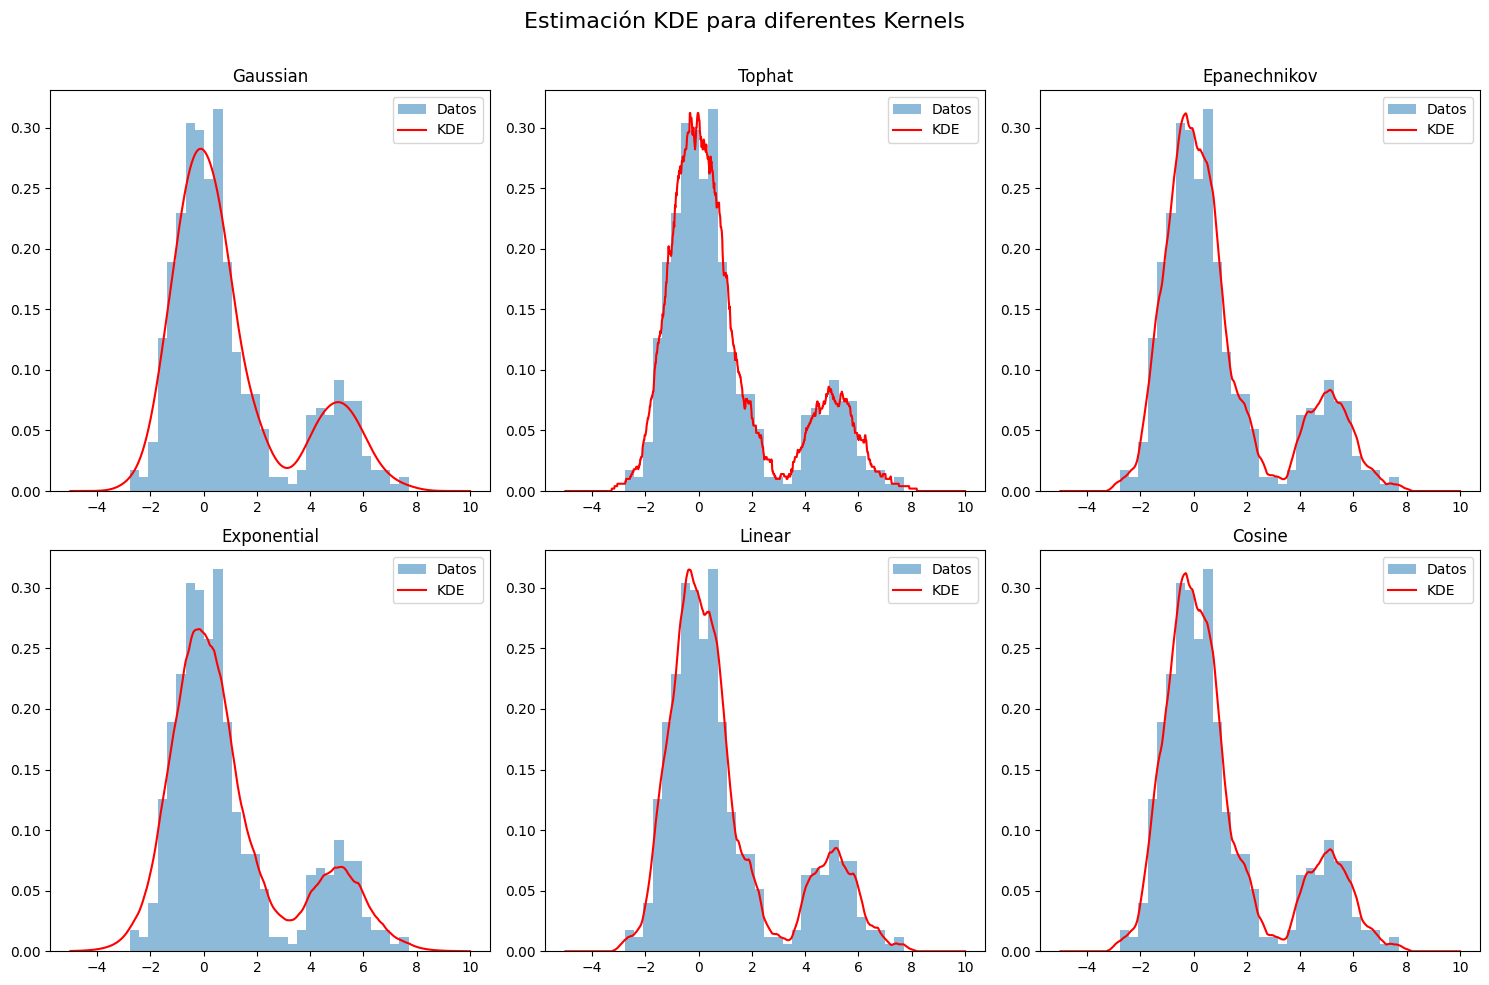

In [11]:
# Definiendo nuevamente la lista de kernels y generando la gráfica

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Estimación KDE para diferentes Kernels', fontsize=16)

for ax, kernel in zip(axes.ravel(), kernels):
    # KDE para el kernel actual
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(data)
    log_density = kde.score_samples(x_d)
    density = np.exp(log_density)

    # Graficar
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Datos')
    ax.plot(x_d, density, '-r', label='KDE')
    ax.set_title(kernel.capitalize())
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# KDE para múltiples dimensiones es una extensión natural de la versión unidimensional.

Para un conjunto de datos $D = \{ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N \}$ en $d$ dimensiones, la estimación KDE en el punto \(\mathbf{x}\) se da por:

$$
\hat{f}(\mathbf{x}) = \frac{1}{n(2\pi h^2)^{d/2}} \sum_{n=1}^{N} K\left( \frac{\|\mathbf{x} - \mathbf{x}_n\|}{h} \right)
$$

Donde:
- $\mathbf{x}$ y $\mathbf{x}_i$ son vectores $d$-dimensionales.
- $K$ es el kernel multidimensional, que generalmente es una versión $d$-dimensional de los kernels unidimensionales que mencionamos anteriormente. Por ejemplo, el kernel gaussiano multidimensional tiene la forma:

$$
K(\mathbf{u}) = \frac{1}{(2\pi)^{d/2}} e^{-\frac{1}{2} \mathbf{u}^T \mathbf{u}}
$$

- $h$ es el ancho de banda, que determina el tamaño del "ventana" local alrededor de cada punto.
- $\|\cdot\|$ denota la **norma euclidiana** (distancia) entre dos puntos en el espacio $d$-dimensional.

La elección del kernel y el ancho de banda sigue siendo crucial en múltiples dimensiones, y técnicas como la validación cruzada pueden ser útiles para determinar el valor óptimo del ancho de banda $h$.

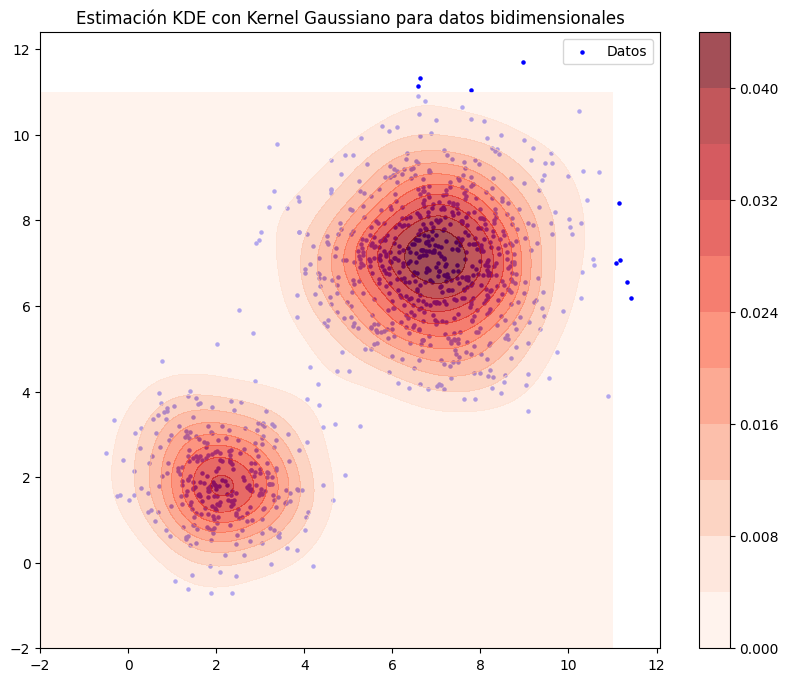

In [10]:
# Generando datos bidimensionales
data_2d = np.vstack([np.random.normal((2, 2), 1, (300, 2)),
                     np.random.normal((7, 7), 1.5, (700, 2))])

# Estimación KDE para datos bidimensionales
kde_2d = KernelDensity(kernel='gaussian', bandwidth=0.7).fit(data_2d)
x = np.linspace(-2, 11, 100)
y = np.linspace(-2, 11, 100)
X, Y = np.meshgrid(x, y)
xy_sample = np.vstack([X.ravel(), Y.ravel()]).T
Z = np.exp(kde_2d.score_samples(xy_sample))
Z = Z.reshape(X.shape)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(data_2d[:, 0], data_2d[:, 1], s=5, c='blue', label='Datos')
plt.contourf(X, Y, Z, levels=10, cmap='Reds', alpha=0.7)
plt.colorbar()
plt.title('Estimación KDE con Kernel Gaussiano para datos bidimensionales')
plt.legend()
plt.show()


## Nadaraya-Watson

El método de regresión de Nadaraya-Watson es una extensión natural de la estimación de densidad del kernel (KDE) aplicada al problema de regresión. Específicamente, es una forma de regresión no paramétrica que utiliza kernels para estimar el valor esperado condicional de una variable dependiente dada una variable independiente.

La fórmula para la estimación de Nadaraya-Watson es:

$$
\hat{y}(x) = \frac{\sum_{n=1}^N K_h(x - x_n) y_n}{\sum_{n=1}^N K_h(x - x_n)}
$$

Donde:
- $\hat{y}(x)$ es la estimación del valor de la variable dependiente en $x$.
- $K_h$ es un kernel con ancho de banda $h$ (similar al usado en KDE).
- $x_n$ y $y_n$ son los puntos del conjunto de datos.
- La fracción representa una media ponderada de los $y_n$ cercanos a $x$, donde los pesos son determinados por el kernel.

La relación entre KDE y la regresión de Nadaraya-Watson se puede entender de la siguiente manera:

1. **Kernels:** Ambos métodos hacen uso de kernels para ponderar las observaciones. En KDE, el kernel se utiliza para estimar la densidad en un punto particular del espacio. En la regresión de Nadaraya-Watson, el kernel se utiliza para calcular un promedio ponderado de los valores observados, dándole más peso a los puntos cercanos al punto de consulta.

2. **Ancho de banda $h$:** Al igual que en KDE, el ancho de banda en la regresión de Nadaraya-Watson es crucial. Un \( h \) pequeño dará más peso a las observaciones cercanas, lo que podría llevar a una regresión sobreajustada. Un \( h \) grande puede suavizar demasiado la regresión.

3. **Interpretación:** En KDE, estamos interesados en estimar la densidad de probabilidad en un punto. En la regresión de Nadaraya-Watson, estamos interesados en estimar el valor esperado de la variable dependiente en un punto.

4. **Aplicación:** Mientras que KDE se utiliza principalmente para visualizar y entender la distribución de una variable, la regresión de Nadaraya-Watson se utiliza para hacer predicciones basadas en datos observados.

En resumen, la regresión de Nadaraya-Watson es una extensión del concepto de KDE al problema de regresión. Utiliza la idea de ponderar observaciones cercanas con kernels para hacer predicciones sobre una variable dependiente.

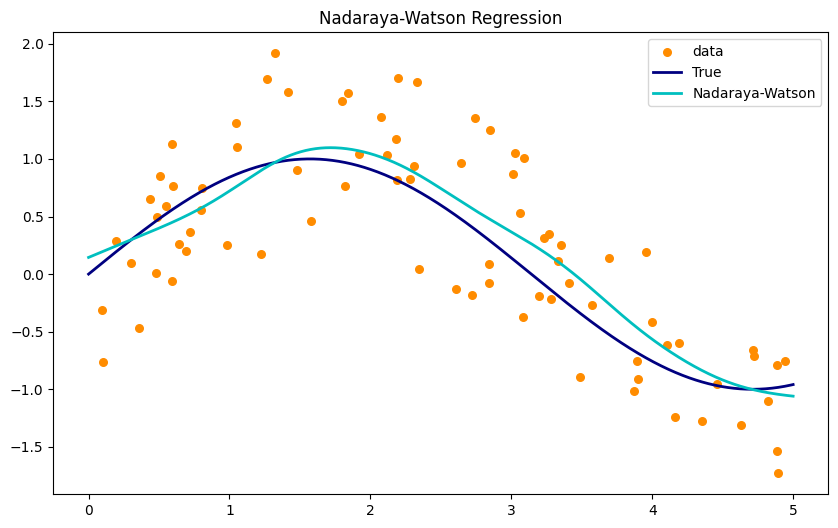

In [14]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import norm

class NadarayaWatson(BaseEstimator, RegressorMixin):
    def __init__(self, kernel="gaussian", bandwidth=1.0):
        self.kernel = kernel
        self.bandwidth = bandwidth

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        # Calcular las distancias entre X y los puntos de entrenamiento
        distances = euclidean_distances(X, self.X_) / self.bandwidth

        # Calcular los pesos del kernel
        if self.kernel == "gaussian":
            weights = norm.pdf(distances)
        else:
            raise ValueError("Unsupported kernel")

        # Estimación de Nadaraya-Watson
        estimates = np.sum(weights * self.y_, axis=1) / np.sum(weights, axis=1)

        return estimates

# Generar datos sintéticos
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])

# Estimación de Nadaraya-Watson
nw = NadarayaWatson(bandwidth=0.4)
nw.fit(X, y)
X_test = np.linspace(0, 5, 1000)[:, np.newaxis]
y_pred = nw.predict(X_test)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', s=30, label='data')
plt.plot(X_test, np.sin(X_test), color='navy', lw=2, label='True')
plt.plot(X_test, y_pred, color='c', lw=2, label='Nadaraya-Watson')
plt.title("Nadaraya-Watson Regression")
plt.legend()
plt.show()


## *Locally weighted regression*

Locally-Weighted Scatterplot Smoothing (LOESS o LOWESS) es una técnica para modelar relaciones no lineales en datos usando regresión no paramétrica. Combina múltiples regresiones realizadas en subconjuntos locales de los datos para producir una respuesta suavizada que capture relaciones no lineales.

$$
\mu(\mathbf x)=\sum_{n=1}^N y_nK_h(\mathbf x-\mathbf x_n)
$$
Lo podemos expresar como:
$$
\mu(\mathbf x)=\min_{\mathbf w}\sum_{n=1}^N(y_n -\mathbf w^T\mathbf x_n)^2K_h(\mathbf x-\mathbf x_n)
$$

### Concepto básico:

1. **Enfoque Local:** Para un punto de consulta $x$ en el conjunto de datos, LOWESS ajusta un modelo (por lo general, lineal) utilizando solo los datos que están "cerca" de $x$. Los datos cercanos se ponderan de acuerdo con su distancia a $x$ utilizando una función de peso (o kernel).

2. **Conjunto de Datos Completo:** LOWESS repite este proceso para cada punto en el conjunto de datos, lo que resulta en una línea suavizada que se ajusta a los datos.



### Proceso detallado:

1. **Ordenar los Datos:** Los datos se ordenan según la variable independiente.

2. **Ponderar:** Para cada punto $x_i$ en el conjunto de datos, se selecciona un subconjunto de datos cercanos y se ponderan de acuerdo con una función de peso. Los datos más cercanos a $x_i$ reciben más peso que los que están más lejos.

3. **Ajuste Local:** Se ajusta un modelo (por lo general, una regresión lineal) a los datos ponderados cerca de $x_i$.

4. **Estimación:** El valor ajustado del modelo en $x_i$ se toma como la estimación suavizada para ese punto.

5. **Repetir:** Este proceso se repite para todos los puntos en el conjunto de datos.

### Parámetros clave:

1. **Ancho de Ventana:** Similar al ancho de banda en KDE, determina qué tan "local" es el ajuste. Un ancho de ventana más pequeño dará más importancia a los puntos muy cercanos al punto de consulta, lo que resultará en una curva más rugosa. Un ancho de ventana más grande suavizará más la estimación.

2. **Función de Peso (Kernel):** Determina cómo se ponderan los puntos dentro de la ventana. Una función comúnmente utilizada es el tricube.

### Ventajas:

- Puede capturar relaciones no lineales complejas en los datos.
- No requiere especificar una forma funcional para la relación (como en la regresión polinómica).

### Desventajas:

- Computacionalmente más intensivo que otros métodos de regresión.
- La elección del ancho de ventana y la función de peso puede influir en el resultado.

En resumen, LOWESS es una poderosa técnica de suavizado que puede ayudar a visualizar y modelar relaciones no lineales en datos sin asumir una forma funcional específica para esa relación. Es especialmente útil para la exploración de datos y la visualización.

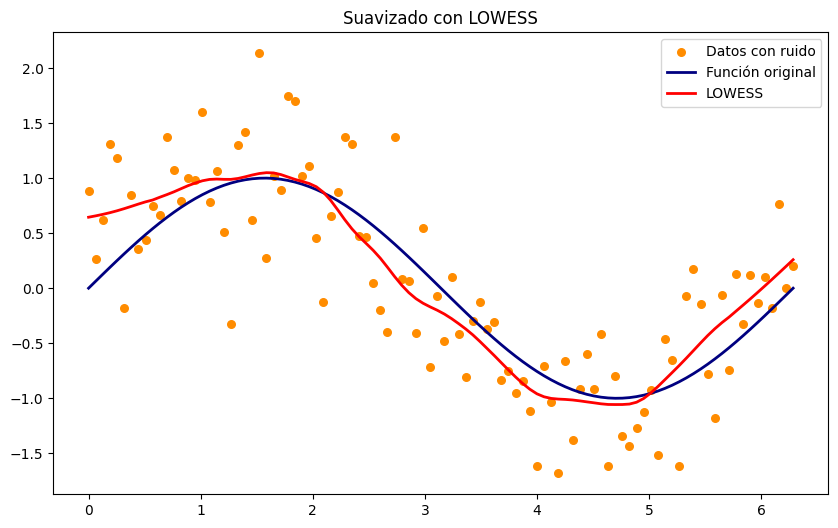

In [16]:
# Reimportando bibliotecas y regenerando los datos

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Generar datos sintéticos
np.random.seed(0)
X = np.linspace(0, 2 * np.pi, 100)
Y = np.sin(X) + np.random.normal(scale=0.5, size=100)

# Aplicar LOWESS
smoothed = lowess(Y, X, frac=0.2)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='darkorange', s=30, label='Datos con ruido')
plt.plot(X, np.sin(X), color='navy', lw=2, label='Función original')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', lw=2, label='LOWESS')
plt.title("Suavizado con LOWESS")
plt.legend()
plt.show()
